Neural Networks with Keras 

In [1]:
import sklearn

try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris setosa


This perceptron class implements a single TLU network 

In [4]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

In [6]:
from tensorflow import keras 

Building an image classifier using the sequential API

In [7]:
fsahion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fsahion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
  #create a validation set from the training set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

Creating the model using the sequential API

In [11]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
]) 

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#fetch a layer by its index or by its name

model.layers 

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
model.layers[1].name

'dense'

In [15]:
model.get_layer('dense_1').name 

'dense_1'

All the parameters of a layer can be accessed using its get_weights() and
set_weights() method. For a dense layer, this includes both the connection weights and the bias terms.

In [17]:
hidden1 = model.layers[1]
hidden1.name 

'dense'

In [18]:
model.get_layer(hidden1.name) == hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights 

array([[ 0.06834139,  0.06332292, -0.01469647, ...,  0.0732242 ,
        -0.01486012,  0.05055058],
       [ 0.07059313, -0.05658627,  0.04895578, ...,  0.05865467,
         0.06509881,  0.04576688],
       [-0.02090574,  0.03873405,  0.04514376, ..., -0.0276625 ,
         0.02046782,  0.02763434],
       ...,
       [ 0.00151356, -0.04764072, -0.0474977 , ...,  0.0593134 ,
        -0.06659321, -0.0430696 ],
       [ 0.03025407,  0.03922404,  0.04966977, ...,  0.04837217,
         0.03335522,  0.05148177],
       [ 0.02167812, -0.02672089,  0.00463192, ..., -0.02762908,
         0.02831534, -0.02821851]], dtype=float32)

In [22]:
weights.shape 

(784, 300)

In [23]:
biases 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

the Dense layer initialized the connection weights randomly (which is needed to break symmetry), and the biases were just initialized to zeros, which is fine. 

Compiling the Model. 
    -: To specify the loss function and the optimizer to use. 

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

-: "sparse_categorical_crossentropy" loss is used because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. 
-: sgd just means that the model will be trained using simple stochastic Gradient Descent (back propagation algorithm)
-: Since this is a classifier, it's useful to measure it's accuracy. 

Training and Evaluating the Model

    1. Pass the input features (X_train) and the target classes (y_train) as well as the number of epochs to train.
    2. Pass a validation set (optional)
    3. If performance on training set is much better than the validation set, the model is probably overfitting the training set(or a data mismatch btn the training set and the validation set)

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6782 - loss: 0.9983 - val_accuracy: 0.8334 - val_loss: 0.5032
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8249 - loss: 0.4993 - val_accuracy: 0.8506 - val_loss: 0.4479
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8436 - loss: 0.4459 - val_accuracy: 0.8646 - val_loss: 0.4083
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8497 - loss: 0.4272 - val_accuracy: 0.8570 - val_loss: 0.4241
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.3995 - val_accuracy: 0.8716 - val_loss: 0.3781
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8654 - loss: 0.3826 - val_accuracy: 0.8638 - val_loss: 0.3931
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8698 - loss: 0.3664 - val_accuracy: 0.8676 - val_loss: 0.3835
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3582 - 

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history)containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set

In [27]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [28]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

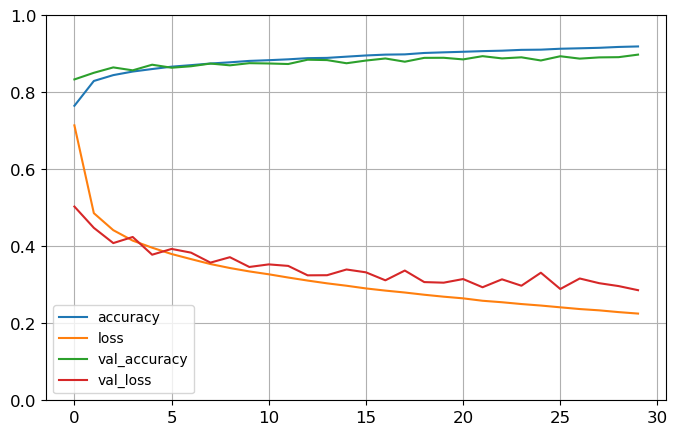

In [30]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set y limit between 0 and 1
plt.show()

Both the training and validation accuracy steadily increase during training, while the training and validation loss decrease.

The validation curves are quite close to the training curves, which means that there is not too
much overfitting. In this particular case, the model performed better on the validation set than on the training set at the beginning of training.

The model has not quite converged, it can be trained further by calling the fit() method until we achieve close to 89% accuracy. 

Evaluate the model 
    -: Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model 

In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8531 - loss: 59.8454


[61.31940460205078, 0.8519999980926514]

resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

Using the Model to Make Predictions 

In [32]:
X_new =X_test[:3] #since we lack new instances, we use the first 3 instances of test set

In [33]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
#find the class with highest estimated probability

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([9, 2, 1], dtype=int64)